# Logbook Blocking 

An implementation of the network-based blocking mechanism

In [8]:
%matplotlib inline
import os 
import sys
import random
import networkx as nx 

## Paths from the file 
PROJECT  = os.path.join(os.getcwd(), "..")
FIXTURES = os.path.join(PROJECT, "fixtures")
DATASET  = os.path.join(FIXTURES, 'activity.csv')

## Append the path for the logbook utilities 
sys.path.append(PROJECT)

from logbook.reader import LogReader 
from logbook.graph import *
from logbook.compare import * 

In [9]:
# Actions to exclude from our graph. 
# exclude = None
exclude=['Subscribed to DDL blog', 'Signed up for new course notifications']

# Load dataset and generate graph
dataset = LogReader(DATASET, exclude=exclude)
G = graph_from_triples(dataset)

print info(G)

Name: Logbook Activity
Type: Graph
Number of nodes: 548
Number of edges: 623
Average degree:   2.2737
Number of Actions: 7
Number of Pairwise Comparisons: 149878
Number of Edge Blocked Comparisons: 136377

Action Counts
-------------
Registered for workshop: 352
Applied to DDL incubator: 198
Applied to DDL research lab: 25
Taught workshop: 16
Organized workshop: 12
Wrote blog post: 12
TA for workshop: 8


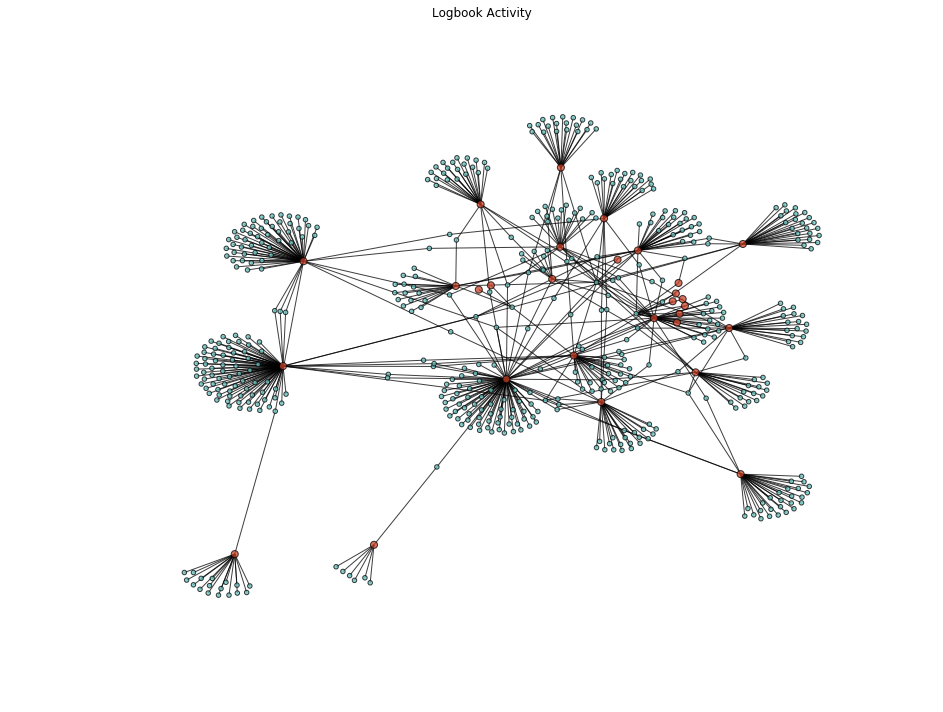

In [10]:
draw_activity_graph(G, connected=True, iterations=100)

## Graph Structured Pairwise Comparisons 

By implementing a graph where person entity nodes are a tuple of `(name, email)` pairs (an immutable data structure that is hashable), we get structure right off the bat by direct comparison. 

The number of pariwise comparisons is computed as: 

$$c = \frac{n(n-1)}{2}$$

Where `n` is the number of nodes in the graph. The graph can be further filtered on entity type as well. Here are a random sample of 5 pairwise node to node comparisons: 

In [ ]:
print "Pairwise Comparisons: {}\n\n".format(pairwise_comparisons(G, True))

combos = list(pairwise_comparisons(G, entity='person'))

random.shuffle(combos)
for idx, pair in enumerate(combos):
    print "Pair {}:".format(idx + 1)
    print "    {}\n      -- vs --\n    {}".format(*pair)
    print
    if idx >= 4: break

Edge structured comparisons only yield nodes so long as the itersection of the node's neighborhoods is empty (that is, two entities can't have an action to the same detail). 

In [ ]:
print "Edge Blocked Pairwise Comparisons: {}\n\n".format(edge_blocked_comparisons(G, True))

combos = list(edge_blocked_comparisons(G, entity='person'))
random.shuffle(combos)
for idx, pair in enumerate(combos):
    print "Pair {}:".format(idx + 1)
    print "    {}".format(pair[0])
    for detail in G.neighbors(pair[0]):
        print "        {}".format(detail)
    print "      -- vs --"
    print "    {}".format(pair[1])
    for detail in G.neighbors(pair[1]):
        print "        {}".format(detail)
    print
    
    if idx >= 4: break

Other structural blocking can then be applied. 

## Fuzziness 

With some blocking in the data structure, we can now begin to do pairwise comparisons. Here, I'll use the `fuzzywuzzy` tool to produce comparisons for the annotator such that the mean of the fuzzy score for both email and name meets a certain threshold. 

In [ ]:
combos = list(edge_blocked_comparisons(G, entity='person'))
combos = filter(lambda pair: fuzzblock(*pair), combos)

print "Fuzz/Edge Blocked Pairwise Comparisons: {}\n\n".format(len(combos))

random.shuffle(combos)
for idx, pair in enumerate(combos):
    print "Pair {}:".format(idx + 1)
    print "    {}".format(pair[0])
    for detail in G.neighbors(pair[0]):
        print "        {}".format(detail)
    print "      -- vs --"
    print "    {}".format(pair[1])
    for detail in G.neighbors(pair[1]):
        print "        {}".format(detail)
    print
    
    if idx >= 100: break

### Domain Counts

In [16]:
from collections import Counter

def count_email_domains():
    counter = Counter()
    for triple in dataset:
        email = triple.entity.email 
        domain = email.split("@")[-1]
        counter[domain] += 1 
    
    return counter

domains = count_email_domains()
for domain in domains.most_common():
    print "{}: {}".format(*domain)

gmail.com: 362
yahoo.com: 35
districtdatalabs.com: 32
hotmail.com: 13
us.pwc.com: 12
capitalone.com: 8
araastat.com: 6
gwu.edu: 6
gwmail.gwu.edu: 4
usnews.com: 4
rocketmail.com: 4
msn.com: 3
georgetown.edu: 3
cornell.edu: 3
icloud.com: 3
deloitte.com: 2
impactresearchinc.com: 2
earthlink.net: 2
viget.com: 2
citechinc.net: 2
outlook.com: 2
gop.com: 2
comcast.net: 2
gqrr.com: 2
iadb.org: 2
jhu.edu: 2
ficonsulting.com: 2
bengfort.com: 2
ida.org: 2
mac.com: 2
l-3com.com: 2
vit.ac.in: 2
vaisman.us: 2
mckesson.com: 2
umd.edu: 2
rashaadsteward.com: 1
whittaker.io: 1
trackmaven.com: 1
cataresources.com: 1
karmancorp.com: 1
legacyforhealth.org: 1
spryinc.com: 1
knights.ucf.edu: 1
jimfulton.info: 1
uconn.edu: 1
manishsehgal.com: 1
mitre.org: 1
watsn.org: 1
rhsmith.umd.edu: 1
att.net: 1
shiversattacks.com: 1
ATT.net: 1
bericotechnologies.com: 1
juno.com: 1
YAHOO.COM: 1
silkworms.com: 1
marksilver.net: 1
lawiq.com: 1
mavs.uta.edu: 1
comscore.com: 1
gezo.net: 1
yahoo.co.uk: 1
verax.io: 1
jmu.edu: 1